# AWS SNS (Simple Notification Service)

O SNS é um serviço da AWS cuja funcionalidade é **enviar mensagens e notificações** de modo confiável. Seu **funcionamento** é pautado no método **Publish/Subscribe (pub/sub)**, onde **as mensagens são recebidas por inscritos nos Topics**.

Inscritos podem ser:
- **Serviços AWS**
- **Notificações push em celulares**
- **Emails**
- **Aplicações customizadas**

O SNS soluciona a dificuldade em comunicar eventos via mensagens distribuídas em sistemas, aplicações e serviços, sendo **fundamental em event-driven architectures** para solucionar problemas de forma rápida e eficiente.


## 🧩 Componentes e Features do SNS

### 1. Topic
Um **logical access point** e canal de comunicação que permite desacoplar Publisher de Subscriber. Existem dois tipos:
- **FIFO (First-In First-Out)**
    - **Preserva a ordem** das mensagens
    - **Entrega única** de mensagens
    - Protocolo de inscrição: **SQS**
    - Usado quando a **ordem é crítica**
    - **Não tolera duplicatas**
- **Standard**
    - Tenta ao máximo manter a ordem das mensagens
    - Usado quando a ordem não é tão importante
    - **Entrega ao menos uma** mensagem
    - Protocolos de inscrição: **SQS, Lambda, Data Firehose, HTTP, SMS, email, celular, endpoints de aplicação mobile**

### 2. Publisher & Subscriber
- **Publishers** enviam mensagens para um Topic
- **Subscribers** recebem mensagens de um Topic

### 3. Subscriptions
- Realiza o mapeamento de um Topic para um dado Subscriber
- **O Subscriber deve se inscrever antes de receber as mensagens**

### 4. Message Delivery
- Modos de envio das mensagens (os mesmos citados anteriormente)

### 5. Fan-out Pattern
- Garante a transmissão simultânea de um Topic para os Subscribers, independente do endpoint
- **Permite assincronicidade em arquiteturas event-driven**

### 6. Message Filtering
- Permite definir regras para filtrar somente as mensagens desejadas
- Pode ser baseado em atributos ou padrões detectados no payload da mensagem

### 7. Encryption with AWS KMS
- Mensagens são criptografadas via **Server-Side Encryption (SSE)**, protegendo seu conteúdo


## 🎯 Benefícios do SNS

- **Transmissão de mensagens (message broadcasting):** envia mensagens para múltiplos dispositivos simultaneamente
- **Aceita múltiplos endpoints:** notificações push mobile, SMS, email, HTTP(s) webhooks
- **Escala automaticamente:** sob demanda
- **Features de segurança:** integração com IAM para gerenciar permissões de publishing e subscribing por Topic
- **Custo baseado no uso:**
    - Número de mensagens por Topic (varia por tipo de request e região)
    - Quantidade de dados transmitidos para fora do SNS
    - Quantidade de retries
    - Notificações mobile push: custo baseado na quantidade entregue
    - **Free-tier:** 1 milhão de mobile push, 1000 emails, 100.000 notificações HTTP(S)
- **Event-driven architecture:** automatiza workflows, atualizações de dashboards, processamento automático de dados de stream, detecção de erros, entre outros


## 🔗 Integrações possíveis

- **Lambda**
- **SQS**
- **CloudWatch**
- **S3**
- **AWS Auto Scaling**
- **DynamoDB**
- **CloudFormation**
- **Data Firehose**


## 🏗️ Arquiteturas event-driven com SNS

### Application-to-Person (A2P)
SNS envia notificações para inscritos no Topic.

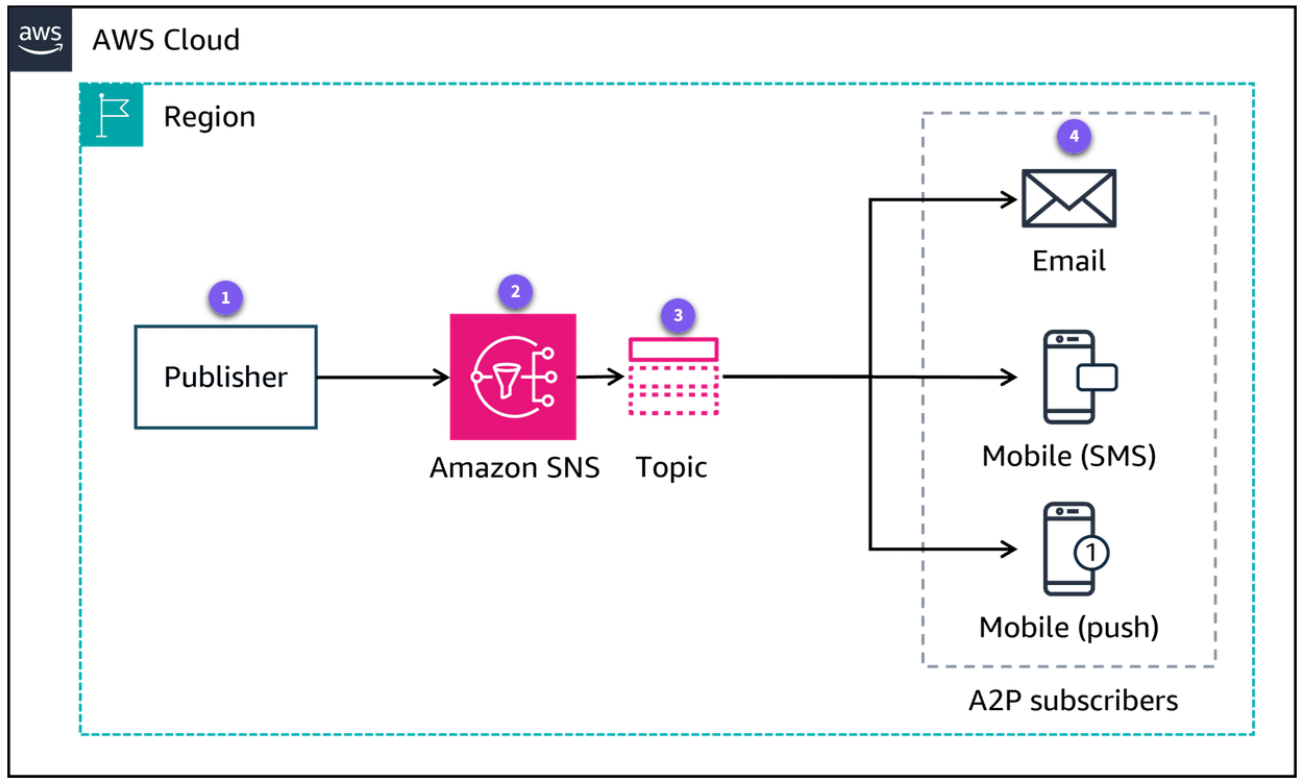

### Application-to-Application (A2A)
Um serviço engatilha uma mensagem para outro serviço, com mínima ou nenhuma participação humana.

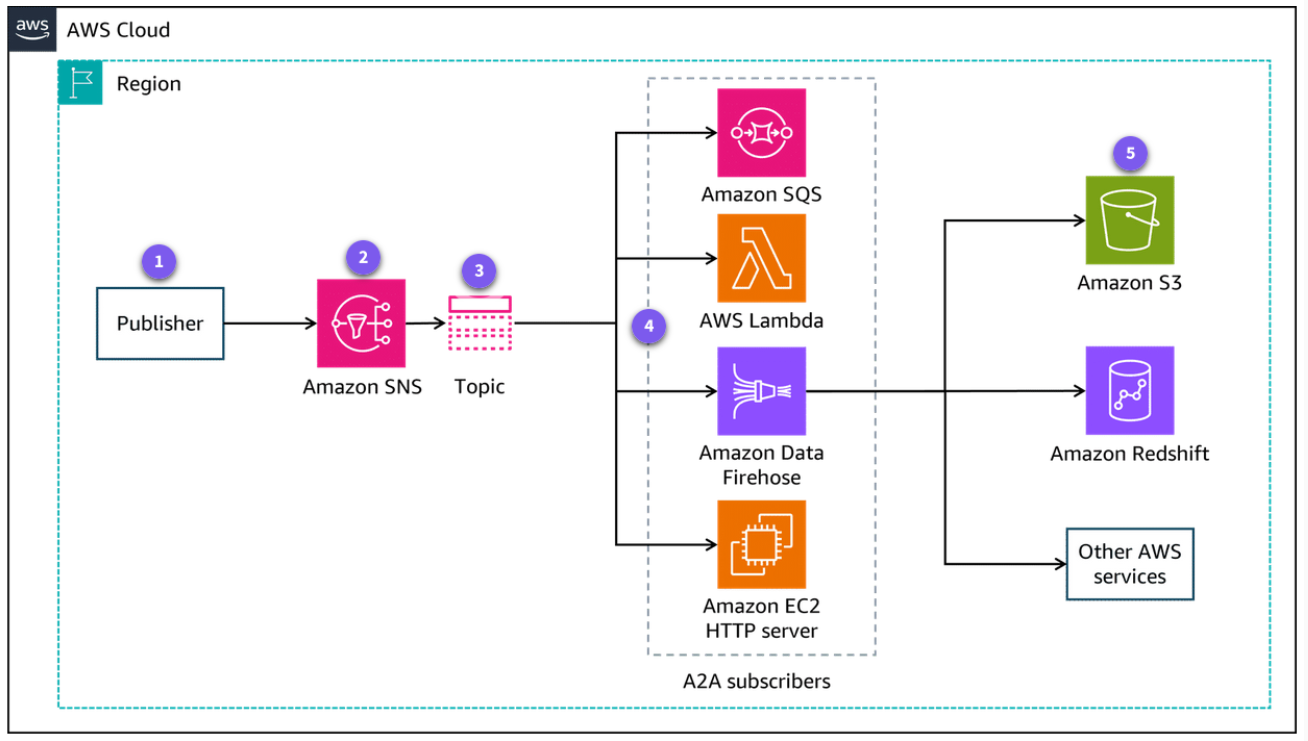


## ✅ Boas Práticas

- **Monitorar custos** via AWS Budgets e AWS Cost Explorer
- Usar **lifecycle**
- Realizar **filtração de mensagens** para reduzir custos de armazenamento e delivery
- Levar em conta o **volume de mensagens, padrões de envio e necessidades de redundância**
- Uso de **múltiplos Topics se necessário**
- Utilizar **SQS para buffer e distribuição de workloads** em múltiplas regiões e AZs, **aumentando a tolerância a falhas**
- Fazer uso de **IAM (controle de acesso), KMS (criptografia de mensagens) e CloudTrail (monitoramento e rastreio)** para tornar o uso seguro